In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
from skimage import io
import cv2 as cv

In [2]:
dtype = {'patient_id':np.int32, 'nodule_no':np.int32, 'subtlety':np.int32, 'internalStructure':np.int32, 'calcification':np.int32, 'sphericity':np.int32, 'margin': np.int32, 'lobulation':np.int32, 'spiculation':np.int32, 'texture':np.int32, 'malignancy':np.int32, 'nod_sz_per_slice':'category'}
meta_df = pd.read_csv('LIDC_data/meta/metadata.csv', index_col='patient_id')


In [3]:
lnums = meta_df['nod_sz_per_slice'].iloc[0]


In [4]:
def convertStrToListInt(row):
    intlist = [ int(num) for num in row[1:-1].split(', ') ]
    return intlist

In [17]:
allnums = []
for _, row in meta_df.iterrows():
    for num in row['nod_sz_per_slice'][1:-1].split(', '):
        if num:
            allnums.append(int(num))


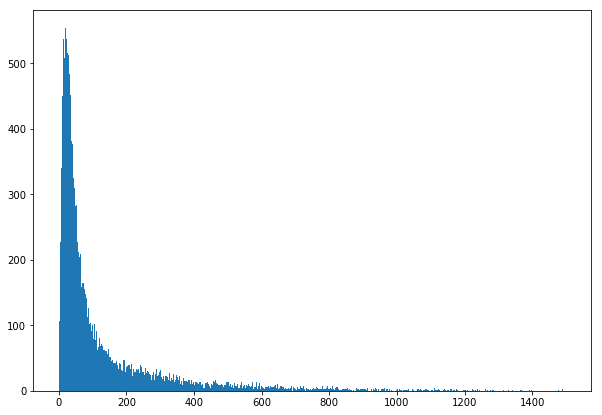

In [18]:
fig = plt.figure(figsize=(10,7))
plt.hist(allnums, bins=500, range=(0,1500))
plt.show()
# right skewed distribution

In [2]:
# average pixel intensity histogram of entier dataset
def allHisto(file_loc):
    fnames = [i for i in glob.glob(file_loc)]
    s=np.array([np.array(cv.imread(fname, -1)) for fname in fnames])
    s_avg=np.mean(s, axis=0) 

    #plot histogram
    # print(s_avg.max(), s_avg.min())
    plt.hist(s_avg.ravel(),bins=256)
    plt.show()

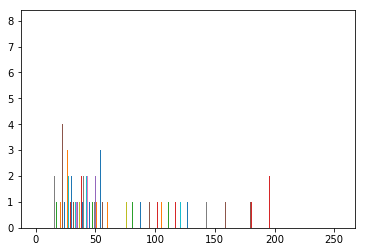

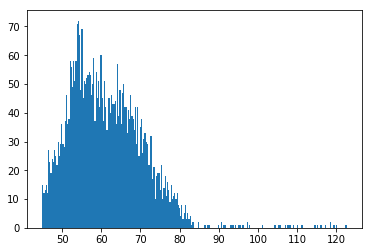

In [3]:
allHisto('/home/rhys/Documents/MScProj/NoisyLabelsMe/LIDC_data/train/scans/*.tif')
# size 11260

### Stochastic samples images

In [3]:
import numpy as np
import PIL
from PIL import Image

prefix = '/home/rhys/Documents/MScProj/NoisyLabelsMe/Results/UNet_Conditional_Stochastic_Confusion_Matrices__width24_depth3_train_batch_5_alpha_1.0_e100_lr0.001/visual_results/test_19_'
list_im = [prefix + 'img.png', prefix + 'label.png', prefix + 'seg_0.png', prefix + 'seg_1.png', prefix + 'seg_2.png', prefix + 'seg_3.png', prefix + 'seg_4.png']
imgs    = [ Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = Image.fromarray( imgs_comb)
imgs_comb.save( 'horizontal.png' )    

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = Image.fromarray( imgs_comb)
imgs_comb.save( 'vertical.png' )

/home/rhys/miniconda3/envs/Lung_vessel_segmentation_HRCT/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.
/home/rhys/miniconda3/envs/Lung_vessel_segmentation_HRCT/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
